# <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 3 - Machine Learning using Tensorflow and Google Colab</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Sunday, October 17th submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">**Group 15 Yixuan Jin UTEID:yj6225**</p>
## <p style="text-align: center;">**Ankit Gupta UTEID:ag76585**</p>

This will be a in-class project done in teams of 2. 

In this Project, we will work with CIFAR10 image dataset. 
The starter code to download the database using keras is given below. 
Test the project on Google Colab running on a CPU, GPU and TPU
 

# In every line of code, please write a comment to briefly explain what that line is doing.
Your grades will be based on your understanding of the code you write! 


In [11]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import utils as np_utils
import os
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from keras import backend as K
import numpy as np

# Task 1
Convert the features in a form that can be given as input to tensorflow library/functions

In this task you will perform data augmentation. That is, pre-process the data to make the model more robust. Experiment with data augmentation techniques like rotation, translation, horizontal-flip, scaling, ZCA whitening and histogram equalization. 
You can choose any two or more augmentation technique(s) of your choice. 

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(50000, 32, 32, 3), y=(50000, 1)


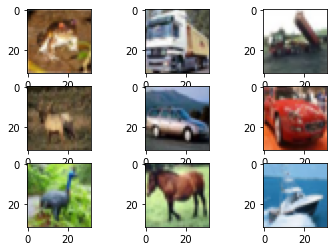

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_train.shape, y_train.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [3]:
# scale pixels
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train/=255
x_test/=255

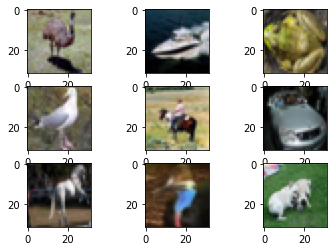

In [47]:
#Show original images without data augmentation
datagen = ImageDataGenerator()
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, seed=499):
  for i in range(0,9):
    pyplot.subplot(330+1 +i)
    pyplot.imshow(x_batch[i])
  pyplot.show()
  break

### Data augmentation with examples

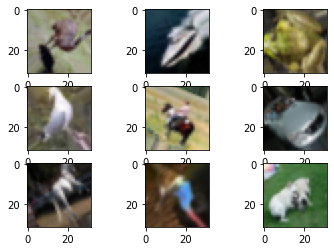

In [58]:
#Rotating Images
datagen = ImageDataGenerator(rotation_range=50)
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, seed=499):
  for i in range(0,9):
    pyplot.subplot(330+1 +i)
    pyplot.imshow(x_batch[i])
  pyplot.show()
  break

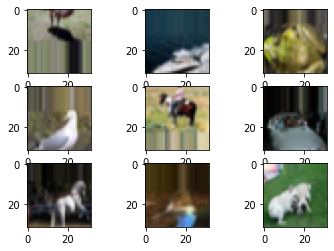

In [60]:
#Shifting image height
datagen = ImageDataGenerator(height_shift_range=0.5)
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, seed=499):
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(x_batch[i])
  pyplot.show()
  break

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floa

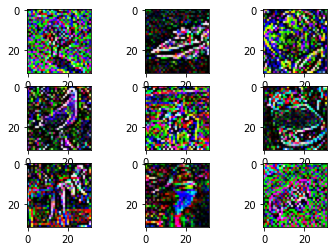

In [62]:
#ZCA Whitening
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, seed=499):
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(x_batch[i])
  pyplot.show()
  break

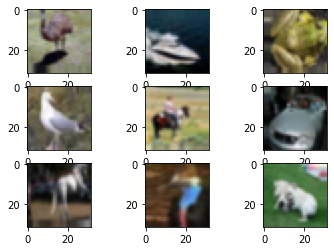

In [4]:
#We choose to use horizontal_flip, width_shift_range, height_shift_range, shear
#Below is the first 9 pictures
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        fill_mode='nearest',
        horizontal_flip=True)

datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train, y_train, seed=499):
  for i in range(0,9):
    pyplot.subplot(330 +1 +i)
    pyplot.imshow(x_batch[i])
  pyplot.show()
  break

# Task 2
Try to build a Neural Network model, train on the features and report the accuracy.
Report your observations on the time taken on CPU and GPU (with and without CuDNN kernel) 



1.   Create a CNN based model with 4 hidden layers with 64, 128, 256 and 512 units in each succesive layer. Use a 5x5 convolution kernel and change as necessary. (Use at least 2 augmentations on your input) 
2.   Create an LSTM based model with 1 LSTM layer with 256 units. 



## CNN Model

In [10]:
import tensorflow as tf

# CNN
def create_cnn_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
    model.add(tf.keras.layers.Conv2D(512, (5, 5), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512))
    model.add(tf.keras.layers.Activation('elu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10))
    model.add(tf.keras.layers.Activation('softmax'))
    return model

In [11]:
cnn_model = create_cnn_model()
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

### CNN Model on CPU

In [11]:
%%time
#With data augmentation use horizontal_flip, width_shift_range, height_shift_range, shear
cnn_model.fit_generator(datagen.flow(x_train, y_train, seed=499),
                        epochs=10, steps_per_epoch=60,
                        validation_data=(x_test, y_test), workers=4)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
60/60 [==============================] - 116s 2s/step - loss: 2.5230 - sparse_categorical_accuracy: 0.2255 - val_loss: 1.9880 - val_sparse_categorical_accuracy: 0.2941
Epoch 2/10
60/60 [==============================] - 116s 2s/step - loss: 2.3768 - sparse_categorical_accuracy: 0.2432 - val_loss: 1.7526 - val_sparse_categorical_accuracy: 0.3597
Epoch 3/10
60/60 [==============================] - 115s 2s/step - loss: 2.3067 - sparse_categorical_accuracy: 0.2637 - val_loss: 1.6826 - val_sparse_categorical_accuracy: 0.3897
Epoch 4/10
60/60 [==============================] - 115s 2s/step - loss: 2.2006 - sparse_categorical_accuracy: 0.2740 - val_loss: 1.8487 - val_sparse_categorical_accuracy: 0.3752
Epoch 5/10
60/60 [==============================] - 115s 2s/step - loss: 2.2633 - sparse_categorical_accuracy: 0.2609 - val_loss: 1.6797 - val_sparse_categorical_accuracy: 0.3857
Epoch 6/10
60/60 [==============================] - 115s 2s/step - loss: 2.1474 - sparse_categorical_accu

### CNN Model on GPU

In [13]:
%%time
#With data augmentation use horizontal_flip, width_shift_range, height_shift_range, shear
cnn_model.fit_generator(datagen.flow(x_train, y_train, seed=499),
                        epochs=10, steps_per_epoch=60,
                        validation_data=(x_test, y_test), workers=4)

Epoch 1/10
 1/60 [..............................] - ETA: 4s - loss: 2.1380 - sparse_categorical_accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


60/60 [==============================] - 3s 49ms/step - loss: 2.1275 - sparse_categorical_accuracy: 0.2833 - val_loss: 1.6262 - val_sparse_categorical_accuracy: 0.4193
Epoch 2/10
60/60 [==============================] - 3s 42ms/step - loss: 2.0322 - sparse_categorical_accuracy: 0.3004 - val_loss: 1.6890 - val_sparse_categorical_accuracy: 0.3777
Epoch 3/10
60/60 [==============================] - 3s 42ms/step - loss: 1.9627 - sparse_categorical_accuracy: 0.3240 - val_loss: 1.6394 - val_sparse_categorical_accuracy: 0.4159
Epoch 4/10
60/60 [==============================] - 3s 42ms/step - loss: 1.9802 - sparse_categorical_accuracy: 0.3193 - val_loss: 1.5748 - val_sparse_categorical_accuracy: 0.4318
Epoch 5/10
60/60 [==============================] - 3s 42ms/step - loss: 1.8944 - sparse_categorical_accuracy: 0.3432 - val_loss: 1.5471 - val_sparse_categorical_accuracy: 0.4261
Epoch 6/10
60/60 [==============================] - 3s 42ms/step - loss: 1.8781 - sparse_categorical_accuracy: 0.341

### For CNN Model, we can clearly see that the time taken to run on CPU is much slower than GPU. For the CPU, it takes total time of 37 mins and wall time 20 mins. But for GPU, it only takes total of 34s and wall time 29s.
### The accuracy we got from GPU is 45.8% and from CPU is 45.16%.

## LSTM Model

In [13]:
import tensorflow as tf
batch_size = 64
# Each CIFAR image batch is a tensor of shape (batch_size, 32, 32).
# Each input sequence will be of size (32, 32) (height is treated like time).
input_dim = 3   # Features

units = 256
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
  # CuDNN is only available at the layer level, and not at the cell level.
  # This means `LSTM(units)` will use the CuDNN kernel,
  # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
  if allow_cudnn_kernel:
    # The LSTM layer with default options uses CuDNN.
    lstm_layer = tf.keras.layers.LSTM(units, input_shape = (1024, input_dim))
  else:
    # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
    lstm_layer = tf.keras.layers.RNN(
        tf.keras.layers.LSTMCell(units), input_shape = (1024, input_dim))
  model = tf.keras.models.Sequential([
      lstm_layer,
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(output_size, activation='softmax')]
  )
  return model

In [14]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
#Reshaping and Normalizing training and test images
x_train_2 = x_train.reshape(50000, 1024, 3)
x_train_2 = x_train_2/255 
x_test_2 = x_test.reshape(10000, 1024, 3)
x_test_2 = x_test_2/255

In [16]:
x_train_2.shape

(50000, 1024, 3)

In [17]:
# with CuDNN kernel
lstm_model = build_model(allow_cudnn_kernel=True)
lstm_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

In [8]:
# without CuDNN kernel
lstm_model_nC = build_model(allow_cudnn_kernel=False)

lstm_model_nC.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='sgd',
    metrics=['accuracy']
)

### LSTM Model on CPU


In [9]:
%%time
#With CuDNN
lstm_model.fit(x_train_2, y_train,
               epochs=10, steps_per_epoch=60, batch_size = batch_size,
               validation_data=(x_test_2,y_test))

Epoch 1/10
60/60 [==============================] - 399s 7s/step - loss: 2.2588 - accuracy: 0.1651 - val_loss: 2.2929 - val_accuracy: 0.1735
Epoch 2/10
60/60 [==============================] - 395s 7s/step - loss: 2.1983 - accuracy: 0.1956 - val_loss: 2.2876 - val_accuracy: 0.1485
Epoch 3/10
60/60 [==============================] - 395s 7s/step - loss: 2.1894 - accuracy: 0.1927 - val_loss: 2.2800 - val_accuracy: 0.1703
Epoch 4/10
60/60 [==============================] - 395s 7s/step - loss: 2.1723 - accuracy: 0.2034 - val_loss: 2.2696 - val_accuracy: 0.1962
Epoch 5/10
60/60 [==============================] - 396s 7s/step - loss: 2.1692 - accuracy: 0.1982 - val_loss: 2.2645 - val_accuracy: 0.1367
Epoch 6/10
60/60 [==============================] - 396s 7s/step - loss: 2.1653 - accuracy: 0.2034 - val_loss: 2.2573 - val_accuracy: 0.1530
Epoch 7/10
60/60 [==============================] - 395s 7s/step - loss: 2.1828 - accuracy: 0.1940 - val_loss: 2.2334 - val_accuracy: 0.1919
Epoch 8/10
60

In [10]:
%%time
#Without CuDNN
#Because this one is taking too long so we just use 1 epoch
lstm_model_nC.fit(x_train_2, y_train,
               epochs=1, steps_per_epoch=60, batch_size = batch_size,
               validation_data=(x_test_2,y_test))

60/60 [==============================] - 398s 7s/step - loss: 2.2549 - accuracy: 0.1625 - val_loss: 2.2941 - val_accuracy: 0.1416
CPU times: user 10min 22s, sys: 35 s, total: 10min 57s
Wall time: 7min 23s


### For LMST model running on CPU with and withou the CuDNN library, we find out that the time taken to run 1 epoch without the library is longer than if we run 10 epoch using the library.

### LSTM Model on GPU

In [27]:
%%time
#With CuDNN
lstm_model.fit(x_train_2, y_train,
               epochs=10, steps_per_epoch=60, batch_size = batch_size,
               validation_data=(x_test_2,y_test))

Epoch 1/10
60/60 [==============================] - 15s 175ms/step - loss: 2.2552 - accuracy: 0.1656 - val_loss: 2.2933 - val_accuracy: 0.1720
Epoch 2/10
60/60 [==============================] - 10s 166ms/step - loss: 2.1911 - accuracy: 0.1971 - val_loss: 2.2876 - val_accuracy: 0.1710
Epoch 3/10
60/60 [==============================] - 10s 167ms/step - loss: 2.1843 - accuracy: 0.1971 - val_loss: 2.2797 - val_accuracy: 0.1674
Epoch 4/10
60/60 [==============================] - 10s 166ms/step - loss: 2.1821 - accuracy: 0.2104 - val_loss: 2.2732 - val_accuracy: 0.1752
Epoch 5/10
60/60 [==============================] - 10s 167ms/step - loss: 2.1758 - accuracy: 0.2052 - val_loss: 2.2641 - val_accuracy: 0.1655
Epoch 6/10
60/60 [==============================] - 10s 166ms/step - loss: 2.1781 - accuracy: 0.1992 - val_loss: 2.2490 - val_accuracy: 0.1875
Epoch 7/10
60/60 [==============================] - 10s 167ms/step - loss: 2.1744 - accuracy: 0.2167 - val_loss: 2.2340 - val_accuracy: 0.1790

In [10]:
%%time
#Without CuDNN
#Because this one is taking too long so we just use 1 epoch
lstm_model_nC.fit(x_train_2, y_train,
               epochs=1, steps_per_epoch=60, batch_size = batch_size,
               validation_data=(x_test_2,y_test))

60/60 [==============================] - 96s 2s/step - loss: 2.2133 - accuracy: 0.1930 - val_loss: 2.2915 - val_accuracy: 0.1543
CPU times: user 2min 15s, sys: 16.5 s, total: 2min 31s
Wall time: 1min 36s


### For LMST model running on GPU with and withou the CuDNN library, we find out that the time taken to run 1 epoch without the library (total: 2min 31s Wall time: 1min 36s) is longer than if we run 10 epoch using the library(total: 1min 21s Wall time: 1min 45s).
### Also, if we compare the time between CPU and GPU using CuDNN library, we can see that the GPU (total: 1min 21s Wall time: 1min 45s) is way more faster than CPU(total: 1h 49min 23s Wall time: 1h 6min 24s)
### Without the CuDNN library, we see that the GPU (total: 2min 31s Wall time: 1min 36s), CPU (total: 10min 57s Wall time: 7min 23s) GPU is still faster than CPU.

# Task 3
Run the LSTM solution in Task2 on a TPU and report the performance 

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import collections
import matplotlib.pyplot as plt
import numpy as np

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import layers

In [22]:
#Setting up the TPU on Google Colab
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.38.244.114:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.38.244.114:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.38.244.114:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


In [23]:
with strategy.scope():
  model = build_model(allow_cudnn_kernel=True)
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

In [24]:
%%time
#With CuDNN on TPU
model.fit(x_train_2, y_train,
               epochs=10, steps_per_epoch=60, batch_size = batch_size,
               validation_data=(x_test_2,y_test))

Epoch 1/10
60/60 [==============================] - 23s 301ms/step - loss: 2.2368 - sparse_categorical_accuracy: 0.1807 - val_loss: 2.2938 - val_sparse_categorical_accuracy: 0.1068
Epoch 2/10
60/60 [==============================] - 8s 134ms/step - loss: 2.2134 - sparse_categorical_accuracy: 0.1815 - val_loss: 2.2917 - val_sparse_categorical_accuracy: 0.1214
Epoch 3/10
60/60 [==============================] - 8s 133ms/step - loss: 2.1951 - sparse_categorical_accuracy: 0.1938 - val_loss: 2.2847 - val_sparse_categorical_accuracy: 0.1186
Epoch 4/10
60/60 [==============================] - 8s 134ms/step - loss: 2.1935 - sparse_categorical_accuracy: 0.1875 - val_loss: 2.2799 - val_sparse_categorical_accuracy: 0.1279
Epoch 5/10
60/60 [==============================] - 8s 132ms/step - loss: 2.1754 - sparse_categorical_accuracy: 0.2031 - val_loss: 2.2783 - val_sparse_categorical_accuracy: 0.1322
Epoch 6/10
60/60 [==============================] - 8s 132ms/step - loss: 2.1813 - sparse_categoric

### For TPU running using LSTM model we got accuracy of 19.84% and the time taken is (total: 20.5 s Wall time: 1min 43s) which is way much faster than GPU and CPU.